<a href="https://colab.research.google.com/github/yawMD/artificial-intelligence-and-machine-learning/blob/master/neural%20network%20n%20fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

87916544/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_____________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
11/11 [==============================] - 295s 25s/step - loss: 9.7917 - accuracy: 0.3576 - val_loss: 5.2377 - val_accuracy: 0.5546
Epoch 2/10
11/11 [==============================] - 10s 926ms/step - loss: 4.5413 - accuracy: 0.5930 - val_loss: 1.8896 - val_accuracy: 0.7586
Epoch 3/10
11/11 [==============================] - 10s 947ms/step - loss: 2.2328 - accuracy: 0.6831 - val_loss: 2.1159 - val_accuracy: 0.7845
Epoch 4/10
11/11 [==============================] - 10s 926ms/step - loss: 1.3116 - accuracy: 0.8081 - val_loss: 0.5029 - val_accuracy: 0.9080
Epoch 5/10
11/11 [==============================] - 10s 927ms/step - loss: 0.7152 - accuracy: 0.8721 - val_loss: 0.5806 - val_accuracy: 0.8764
Epoch 6/10
11/11 [==============================] - 10s 940ms/step - loss: 0.7487 - accuracy: 0.8605 - val_loss: 0.5693 - val_accuracy: 0.9023
Epoch 7/10
11/11 [==============================] - 10s 929ms/step - loss: 0.8215 - accuracy: 0.8634 - val_loss: 0.2403 - val_accuracy: 0.9425


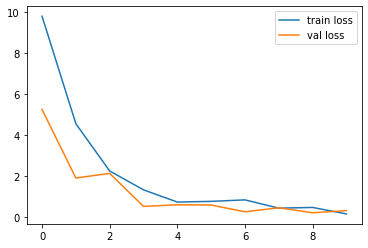

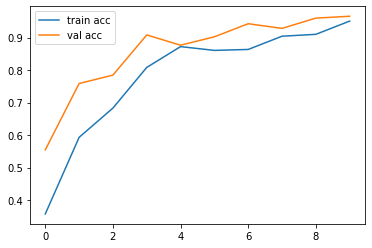

AttributeError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import tensorflow as tf
#import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/CORE DATASET/Train'
valid_path = '/content/drive/MyDrive/CORE DATASET/Test'

# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/CORE DATASET/Train/*')

# our layers - you can add more if you want
x = Flatten()(inception.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CORE DATASET/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CORE DATASET/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# save it as a h5 file


from tensorflow.keras.models import load_model

KERAS_MODEL = 'model_inception.h5'
model.save(KERAS_MODEL)
y_pred = model.predict(test_set)
y_pred

TF_lite_converter = tf.lite.TFLite_converter.from_keras_model(model)
tflite_model = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)



import numpy as np
y_pred = np.argmax(y_pred, axis=1)

y_pred

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


model=load_model('model_resnet50.h5')
img_data

img=image.load_img('/content/drive/MyDrive/CORE DATASET/Test/Conglomerate/4.jpg',target_size=(224,224))

x=image.img_to_array(img)
x
x.shape
x=x/255

import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

model.predict(img_data)

a=np.argmax(model.predict(img_data), axis=1)
a==1
import tensorflow as tf
tf.__version__

In [82]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import plotly as py
warnings.filterwarnings("ignore")




In [17]:
pd.plotting.register_matplotlib_converters()

In [55]:
Data = pd.read_excel("/content/final_data.xlsx")
Data.head()

,Date,smoothed lake height variation
0,1992-10-04,3.94
1,1992-10-14,4.00
2,1992-10-24,4.18
3,1992-11-03,4.11
4,1992-11-13,999.99


In [56]:
df = Data.reset_index()
df.head()

,index,Date,smoothed lake height variation
0,0,1992-10-04,3.94
1,1,1992-10-14,4.00
2,2,1992-10-24,4.18
3,3,1992-11-03,4.11
4,4,1992-11-13,999.99


In [57]:
df = df.rename(columns={'Date':'ds','smoothed lake height variation':'y'})
df.head()

,index,ds,y
0,0,1992-10-04,3.94
1,1,1992-10-14,4.00
2,2,1992-10-24,4.18
3,3,1992-11-03,4.11
4,4,1992-11-13,999.99


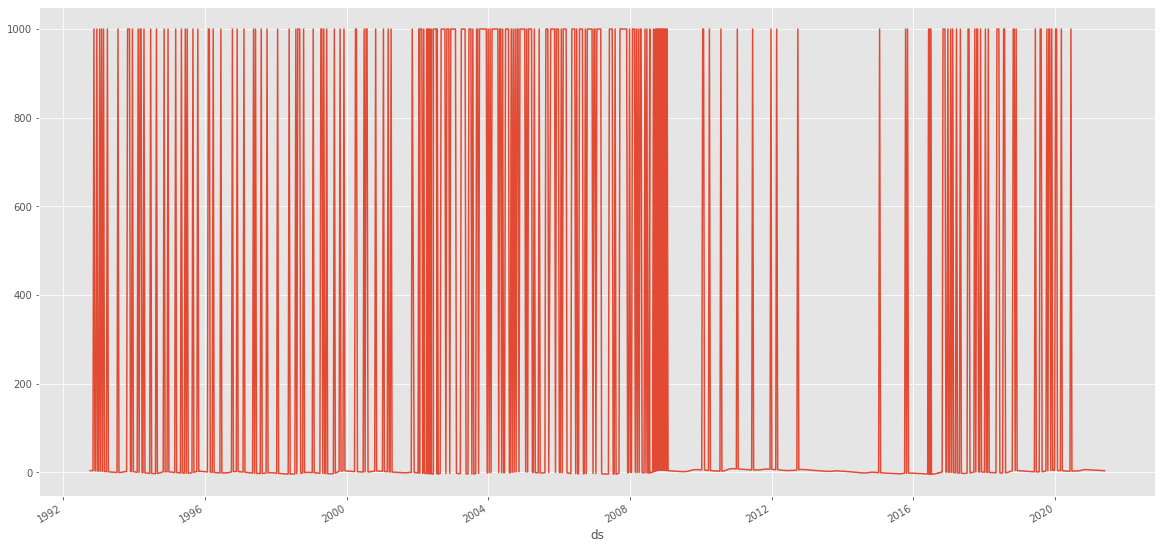

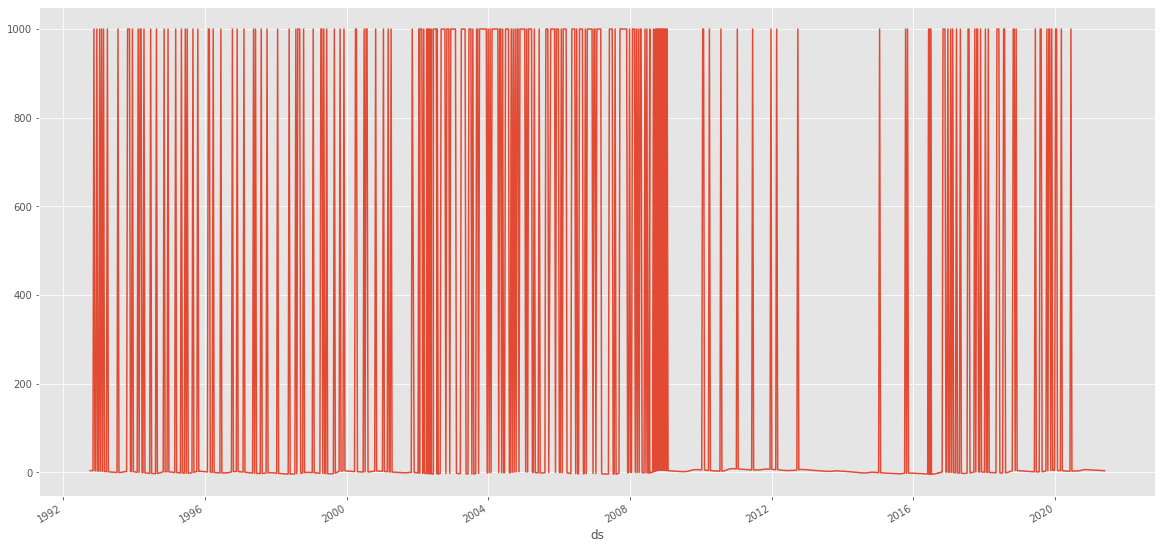

In [58]:
import pandas as pd
import numpy as np
import pystan
from fbprophet import Prophet
import matplotlib.pyplot as plt

plt.figure()
df.set_index('ds').y.plot().get_figure()



In [38]:
pip install fbProphet


In [59]:
model = Prophet(weekly_seasonality=True)
model.fit(df);
model.weekly_seasonality

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


True

In [60]:
future = model.make_future_dataframe(periods=24,freq= 'm')
future.tail()

,ds
1063,2022-12-31
1064,2023-01-31
1065,2023-02-28
1066,2023-03-31
1067,2023-04-30


In [61]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1063,2022-12-31,31.320945,-535.501749,494.150864,29.364731,33.306443,-31.285112,-31.285112,-31.285112,-1.063781,-1.063781,-1.063781,-30.221331,-30.221331,-30.221331,0.0,0.0,0.0,0.035833
1064,2023-01-31,29.667306,-424.605297,647.849280,27.497240,31.888421,110.294603,110.294603,110.294603,33.801613,33.801613,33.801613,76.492990,76.492990,76.492990,0.0,0.0,0.0,139.961909
1065,2023-02-28,28.173695,-425.831621,619.213896,25.821805,30.517851,81.481804,81.481804,81.481804,33.801613,33.801613,33.801613,47.680191,47.680191,47.680191,0.0,0.0,0.0,109.655499
1066,2023-03-31,26.520056,-503.842500,495.431547,23.978094,29.074390,-19.754804,-19.754804,-19.754804,10.190028,10.190028,10.190028,-29.944833,-29.944833,-29.944833,0.0,0.0,0.0,6.765251
1067,2023-04-30,24.919759,-569.816169,451.404515,22.089196,27.696945,-77.717371,-77.717371,-77.717371,-9.967718,-9.967718,-9.967718,-67.749654,-67.749654,-67.749654,0.0,0.0,0.0,-52.797612


In [62]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1063,2022-12-31,0.035833,-535.501749,494.150864
1064,2023-01-31,139.961909,-424.605297,647.849280
1065,2023-02-28,109.655499,-425.831621,619.213896
1066,2023-03-31,6.765251,-503.842500,495.431547
1067,2023-04-30,-52.797612,-569.816169,451.404515


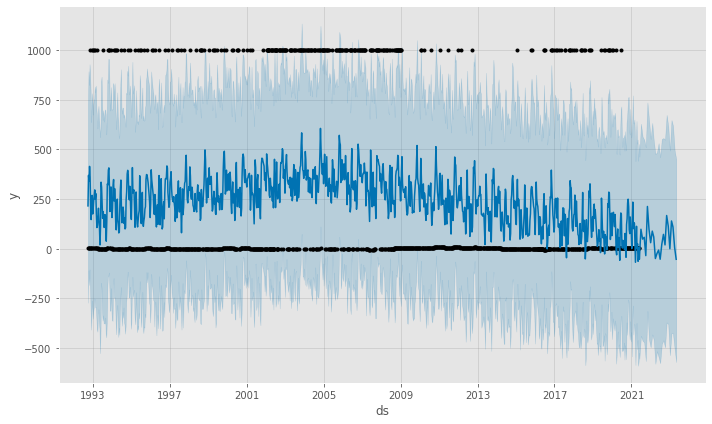

In [63]:
model.plot(forecast);

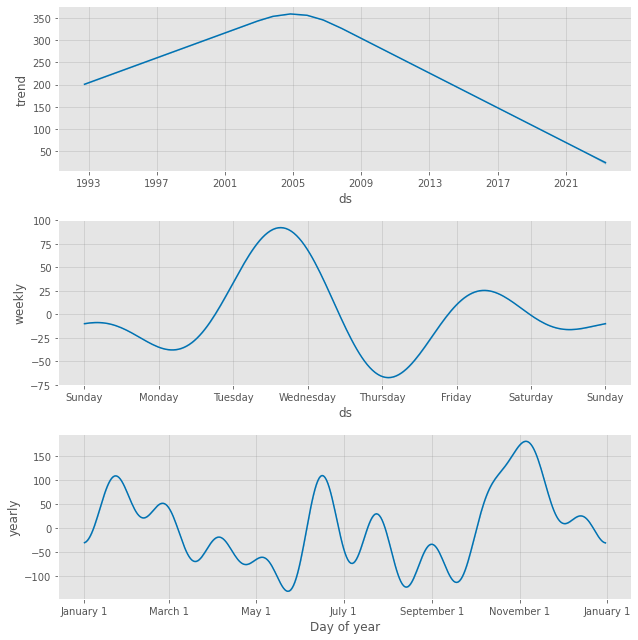

In [65]:
model.plot_components(forecast);

In [68]:
metric_df=forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [69]:
metric_df.tail()

,ds,yhat,y
1126,2022-12-31,0.035833,NaN
1127,2023-01-31,139.961909,NaN
1128,2023-02-28,109.655499,NaN
1129,2023-03-31,6.765251,NaN
1130,2023-04-30,-52.797612,NaN


In [70]:
metric_df.dropna(inplace=True)
metric_df.tail()

,ds,yhat,y
1102,2021-04-17,3.020369,4.42
1103,2021-04-27,25.287711,4.33
1104,2021-05-06,-63.095945,4.21
1105,2021-05-16,-49.607900,4.11
1106,2021-05-26,6.175011,3.92


In [71]:
r2_score(metric_df.y, metric_df.yhat)

0.10729043417915995

In [72]:
mean_squared_error(metric_df.y, metric_df.yhat)

165523.1490563385

In [74]:
mean_absolute_error(metric_df.y, metric_df.yhat)

338.6396188434388

In [76]:
pip install ml_metrics

  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-cp37-none-any.whl size=7845 sha256=8b3af4280e65c0745b74d052e01edf7a78455e58cf6613be55210603426158f6
  Stored in directory: /root/.cache/pip/wheels/b3/61/2d/776be7b8a4f14c5db48c8e5451451cabc58dc6aa7ee3801163
Successfully built ml-metrics


In [78]:
import ml_metrics as metrics
metrics.mae(metric_df.y, metric_df.yhat)

338.6396188434388

In [79]:
metrics.ae(metric_df.y,metric_df.yhat)

array([211.82933937, 365.10186575, 335.32948711, ...,  67.30594456,
        53.71790046,   2.25501094])

In [80]:
metrics.rmse(metric_df.y,metric_df.yhat)

406.8453625842852

AttributeError: ignored